In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 22 09:03:53 2019

@author: dlschns
"""
import re # untuk regex
import numpy as np
import pandas as pd
from collections import defaultdict
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #untuk stemmmer sastrawi

global dfToken, dfFilter, dfStemmed

class Preprocessing:
        
    def tokenisasi(a:str):
        #deklarasi list untuk hasil
        token = a.split(' ')
        char = []
        final = []
        
        #HAPUS TANDA BACA menggunakan import regex
        for i in range(len(token)):
            token[i] = token[i].lower()
            text = re.sub(r'[+)(,.:@#?!&$*\s\-]', '', token[i])
            if (text != '' or text!=' '):
                char.append(text)
        #HAPUS ANGKA menggunakan import regex
        for i in range (len(char)):
            text = re.sub(r'[0-9]', '', char[i])
            if (text != '' or text != ' '):
                final.append(text)
        #mengembalikan nilai yang sudah ditokenisasi
        return (final)
    
    def filtering(tokens:list):
        #filtering menggunakan stopword tala
        file = open('stopword_list_tala.txt', 'r')
        stoplist, filters = [],[]
        stoplist = file.read()
        for i in range(len(tokens)):
            if tokens[i] not in stoplist:
                    filters.append(tokens[i])
        return filters
    
    def Preprocessing(lines:list):
        # TOKENISASI
        hasilToken = []
        
        for i in range(len(lines)):
            t = Preprocessing.tokenisasi(lines[i])
            hasilToken.append(t)
        dfToken = pd.DataFrame(hasilToken)
        
        #FILTERING
        hasilFilter = []
        for i in range(len(hasilToken)):
            f = Preprocessing.filtering(hasilToken[i])
            hasilFilter.append(f)
        dfFilter = pd.DataFrame(hasilFilter)
        
        #STEMMING menggunakan stemmer sastrawi
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        hasilStemming = []
        for i in range(len(hasilFilter)):
            s = list()
            for j in range(len(hasilFilter[i])):
                ss = stemmer.stem(hasilFilter[i][j])
                s.append(ss)
            hasilStemming.append(s)
        dfStemmed = pd.DataFrame(hasilStemming)
        return (dfStemmed)
        
    def Pembobotan(stemmed: list):
        merge = []
        for i in range (len(stemmed)):
            for j in range (len(stemmed[i])):
                merge.append(stemmed[i][j])
        
        daftar = list(dict.fromkeys(merge))
        rawTF = defaultdict(dict)
        
        for key in daftar:
            for val in range(len(stemmed)):
                count = 0
                for i in range(len(stemmed[val])):
                    if(key == stemmed[val][i]):
                        count += 1
                rawTF[key][val] = count
        
        TF_IDF = pd.DataFrame(Preprocessing.TF_IDF(rawTF))
        
        return TF_IDF
    
    def logTF(matrix: defaultdict(dict)):
        TF = defaultdict(dict)
        for key in matrix:
            for val in matrix[key]:
                if(matrix[key][val]  > 0):
                    TF[key][val] = 1 + np.log10(matrix[key][val])
                else :
                    TF[key][val] = 0
        return TF
    
    def IDF(matrix: defaultdict(dict)):
        IDF = defaultdict(dict)
        for key in matrix:
            DF = 0
            for val in matrix[key]:
                if(matrix[key][val] != 0):
                    DF += 1
            IDF[key] = np.log10(len(matrix[key])/DF)
        return IDF

    def TF_IDF(rawTF: defaultdict(dict)):
        TFIDF = defaultdict(dict)
        LogTF = Preprocessing.logTF(rawTF)
        IDF = Preprocessing.IDF(rawTF)
        for key in rawTF:
            for val in rawTF[key]:
                TFIDF[key][val] = LogTF[key][val] * IDF[key]
            
        return TFIDF
        
    def main():
        # membuka data yang berasal dari file txt yang tiap dokumennya dipisahkan dengan baris baru
        f = open("datareviewFD.txt")
        lines = f.readlines()
        #PARSING
        lines = [line.rstrip('\n') for line in open('datareviewFD.txt')]
        return lines

In [2]:
#menjalankan modul
p = Preprocessing
x = p.main()
PP = p.Preprocessing(x)

print ('----------Hasil Preprocessing:')

PP

----------Hasil Preprocessing:


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,lipstick,warna,favorit,banget,nyoba,pake,produk,purbasari,apply,bibir,...,None,None,None,None,None,None,None,None,None,None
1,banget,bau,kaya,hapus,yahh,harga,kualitas,beli,crack,bibir,...,None,None,None,None,None,None,None,None,None,None
2,favorit,cocok,banget,dipake,hari,warna,cantik,banget,bibir,bikin,...,None,None,None,None,None,None,None,None,None,None
3,beli,official,shop,shopee,krn,penasaran,hypenya,dipake,warna,banget,...,None,None,None,None,None,None,None,None,None,None
4,hasil,matte,banget,pribadi,suka,sm,matte,pakai,blp,bagus,...,None,None,None,None,None,None,None,None,None,None
5,harga,gin,lipstik,bagus,banget,formula,baru,ringan,tahan,creamy,...,None,None,None,None,None,None,None,None,None,None
6,lipcream,sesuai,banget,klaim,tahan,jam,juara,banget,daya,tahan,...,None,None,None,None,None,None,None,None,None,None
7,warna,bagusss,bgtttt,kalo,make,lipstik,warna,merah,jatohnya,orange,...,None,None,None,None,None,None,None,None,None,None
8,beli,garagara,penasaran,tekstur,nyoba,kering,banget,aplikasiin,balm,tetep,...,None,None,None,None,None,None,None,None,None,None
9,kalo,pake,lipstick,sariayu,gold,extra,blending,bangetngeblend,banget,bibir,...,None,None,None,None,None,None,None,None,None,None


In [3]:
print ("Hasil TFIDF")

global TF_IDF
tfidf = p.Pembobotan(PP);

TF_IDF = pd.DataFrame(tfidf).transpose()
TF_IDF

Hasil TFIDF


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
lipstick,0.778151,0.000000,0.778151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.778151,0.000000,0.000000,0.000000,0.000000,0.000000
banget,0.221849,0.288632,0.355415,0.221849,0.221849,0.221849,0.288632,0.288632,0.288632,0.221849,...,0.221849,0.000000,0.221849,0.000000,0.000000,0.000000,0.000000,0.000000,0.221849,0.221849
favorit,1.176091,0.000000,1.530130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beli,1.246645,0.778151,0.778151,0.000000,0.000000,0.000000,0.000000,1.012398,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hasil,0.632023,0.000000,0.000000,0.000000,0.632023,0.000000,0.000000,0.000000,0.000000,0.632023,...,0.000000,0.000000,0.632023,0.632023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
harga,0.632023,0.000000,0.000000,0.000000,0.822281,0.632023,0.632023,0.000000,0.000000,0.632023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lipcream,1.477121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
warna,0.154902,0.154902,0.154902,0.201532,0.154902,0.248162,0.154902,0.000000,0.154902,0.154902,...,0.000000,0.154902,0.154902,0.000000,0.201532,0.000000,0.000000,0.000000,0.201532,0.000000
kalo,0.632023,0.000000,0.000000,0.632023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.632023,0.000000,0.000000,0.000000,0.000000
iya,1.176091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.176091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# NAIVE BAYES GAUSSIAN

## FASE TRAINING

In [4]:
global PPTraining
PPTraining = PP

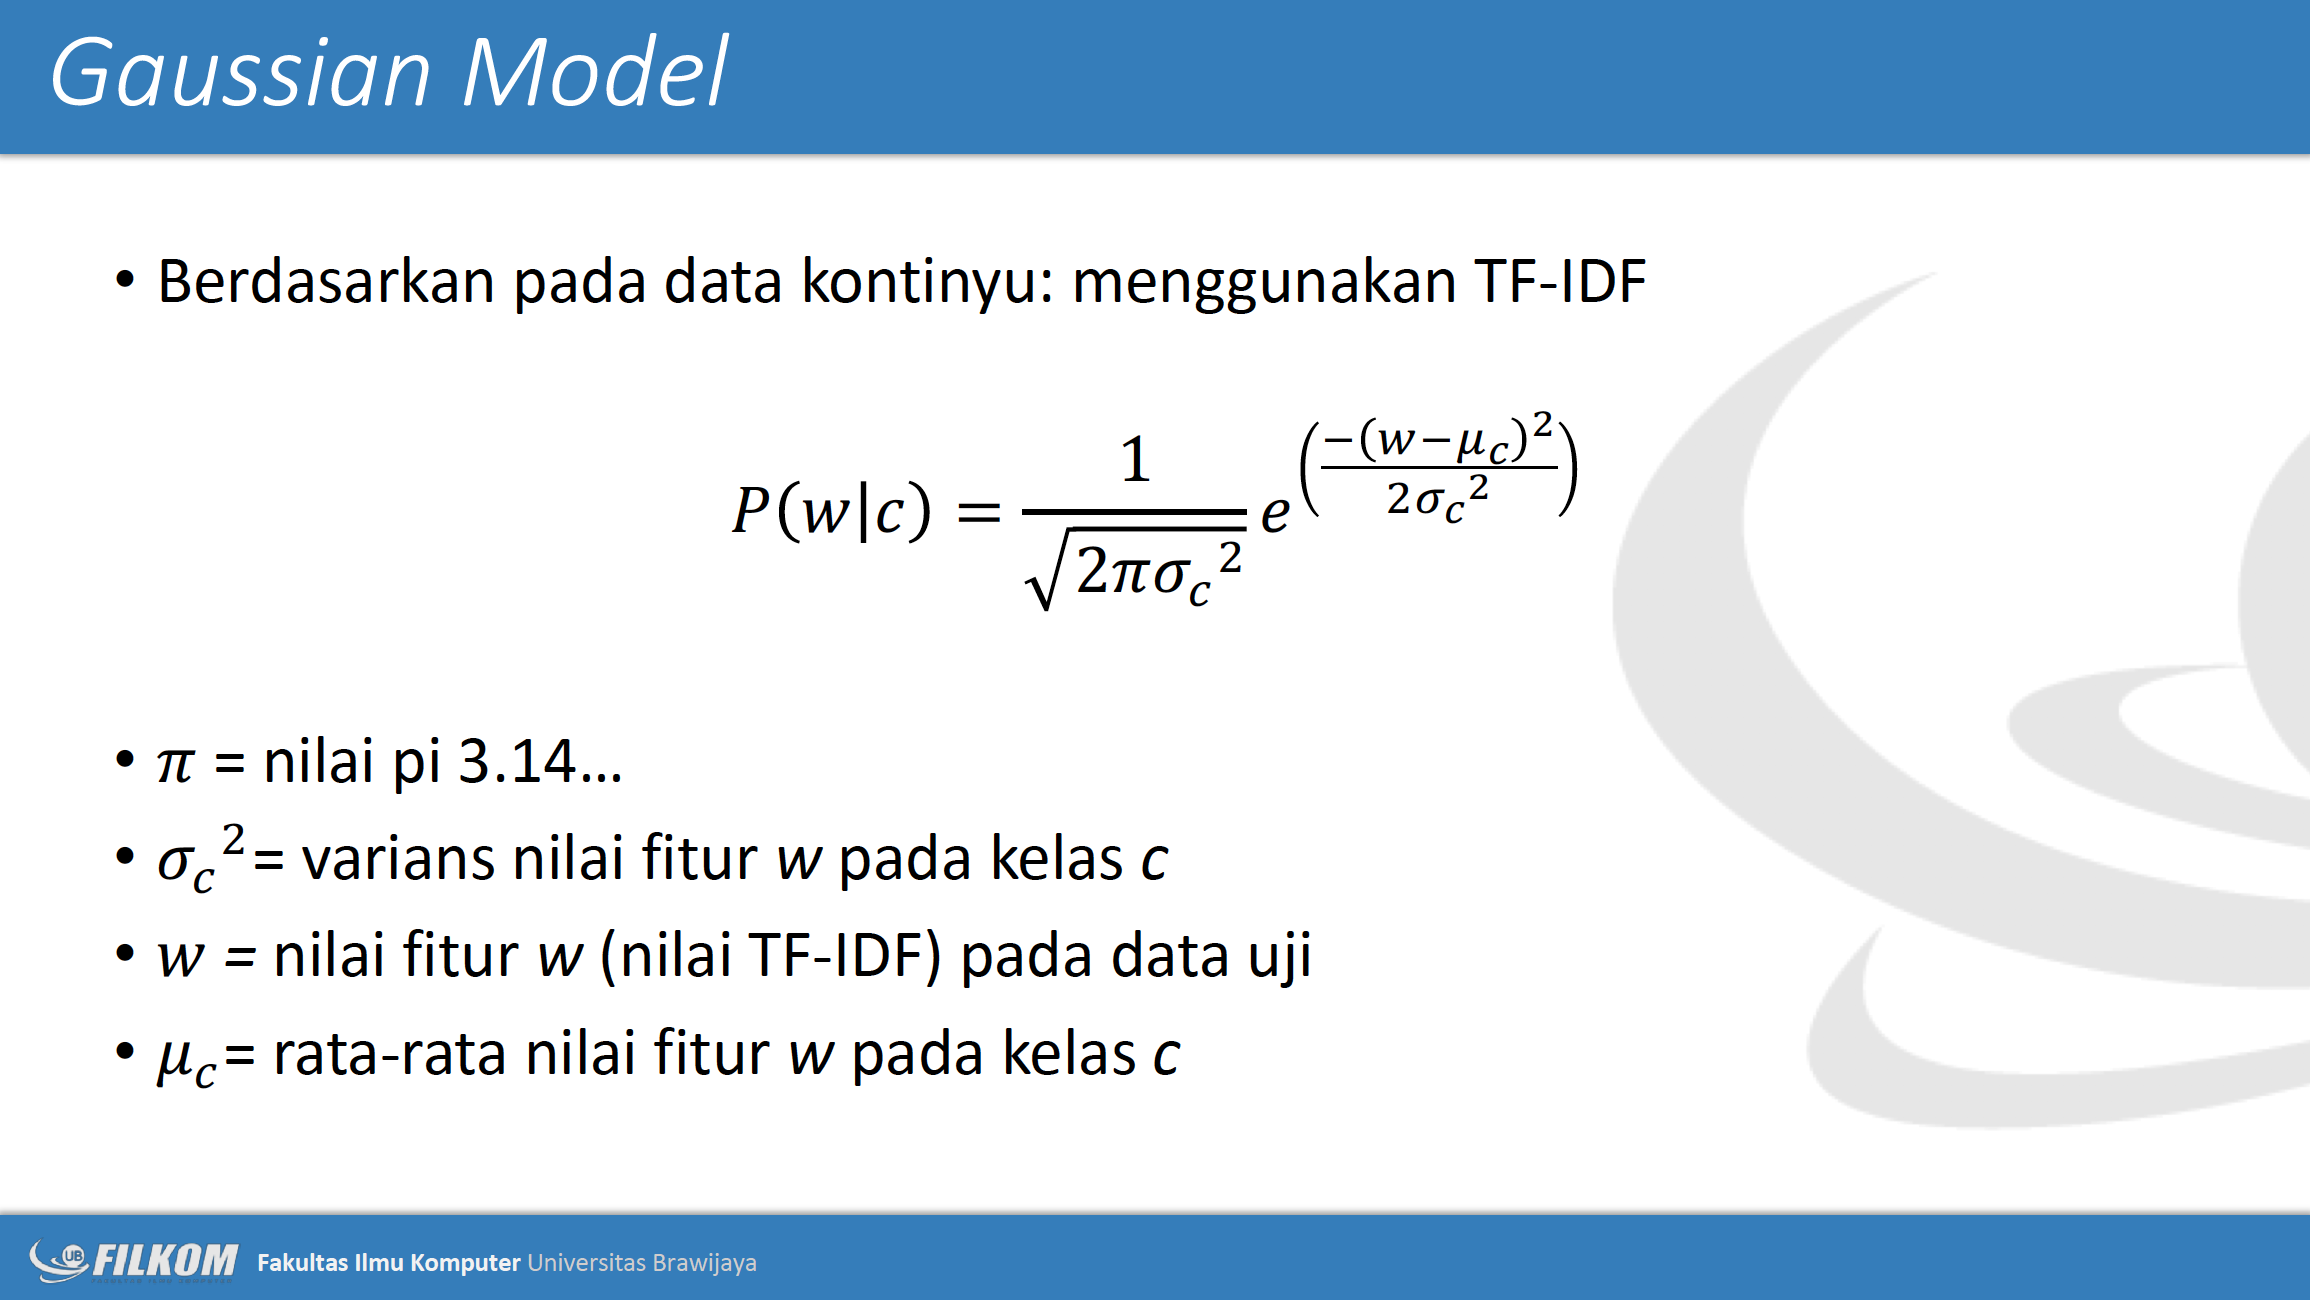

In [5]:
def OpenDok(dokumen: list):                                      
    dok = pd.DataFrame(dokumen,columns=['isi dokumen'])
    return dok

In [6]:
f = open("datareviewFD.txt",encoding="utf8")
dokumen = f.readlines()

global DFdokumen
DFdokumen = OpenDok(dokumen)

In [7]:
def Prior(c:str):
    Prior = len(Kelas(c)) / len(DFdokumen)
    return Prior

In [8]:
def Kelas(c: str):
    kelas = DFdokumen[DFdokumen['isi dokumen'].str.contains(c)]
    return kelas

In [9]:
def nilaiW(c: str):
    kelas = Kelas(c)
    fitur = TF_IDF[TF_IDF.columns[kelas.transpose().columns]]
    return fitur

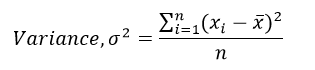

In [10]:
def Variansi(fitur, kelas):
    a = PP[PP.columns[Kelas(kelas).index]].values
    b = []
    for i in range(len(a)):
        for j in a[i]:
            if j is not None:
                b.append(j)

    penyebut = len(b)

    mean = fitur.mean(axis=1)
    pembilang = (np.power(fitur.subtract(mean, axis=0), 2)).sum(axis=1)
    varians = pembilang / penyebut
    
    return varians

In [11]:
Variansi(nilaiW('0'),'0')

lipstick            0.003080
banget              0.000595
favorit             0.003811
beli                0.006540
hasil               0.002794
harga               0.003454
lipcream            0.006012
warna               0.000271
kalo                0.003996
iya                 0.007036
bedak               0.009500
ribet               0.007036
tekstur             0.004235
super               0.005134
nyuri               0.006012
pake                0.000945
nyobain             0.007036
loose               0.002755
eyeshadow           0.003604
sesal               0.006012
telat               0.006012
palette             0.003387
fashion             0.006012
bintang             0.006012
ken                 0.006012
pallete             0.002755
bau                 0.002755
cocok               0.003080
official            0.006012
matte               0.002305
                      ...   
trlalu              0.006012
highlighternya      0.006012
dehh                0.006012
pouch         

In [12]:
def Likelihood(c: str):
    fitur = nilaiW(c)
    varians = Variansi(fitur, c)
    epsilon = 0.000000001 * varians.max()
    varians += epsilon
        
    atas = np.power(fitur.sum(axis=1)-fitur.mean(axis=1),2)
    pembilang = np.exp(-atas / ((varians*2)))
    penyebut = np.sqrt(np.pi*2*(varians))
    Likelihood = pembilang.div(penyebut)
    
    print(varians)
    return Likelihood

In [13]:
global PriorPositif
PriorPositif = Prior('1')
PriorPositif

0.5333333333333333

In [14]:
global PriorNegatif
PriorNegatif = Prior('0')
PriorNegatif

0.4666666666666667

In [15]:
#PERHITUNGAN LIKELIHOOD KELAS POSITIF
LPositif = pd.DataFrame(Likelihood('1'),columns=['Positif'])
LNegatif = pd.DataFrame(Likelihood('0'),columns=['Negatif'])

global LLHood
LLHood = pd.concat([LPositif,LNegatif], axis=1)
LLHood

lipstick            4.469607e-03
banget              7.284781e-04
favorit             5.379820e-03
beli                3.505123e-03
hasil               2.937157e-03
harga               2.937157e-03
lipcream            5.974265e-12
warna               2.837251e-04
kalo                2.948542e-03
iya                 5.974265e-12
bedak               5.974265e-12
ribet               5.974265e-12
tekstur             2.597203e-03
super               1.391359e-03
nyuri               5.974265e-12
pake                8.428491e-04
nyobain             5.974265e-12
loose               4.289216e-03
eyeshadow           2.432274e-03
sesal               5.974265e-12
telat               5.974265e-12
palette             2.386440e-03
fashion             5.974265e-12
bintang             5.974265e-12
ken                 5.974265e-12
pallete             4.289216e-03
bau                 5.788622e-03
cocok               3.617533e-03
official            5.974265e-12
matte               3.179121e-03
          

,Positif,Negatif
lipstick,1.076214e-281,4.248204e-147
banget,0.000000e+00,0.000000e+00
favorit,4.750142e-83,7.224380e-68
beli,1.819371e-174,5.871177e-225
hasil,0.000000e+00,9.090258e-241
harga,0.000000e+00,8.065511e-236
lipcream,1.632179e+05,5.752087e-68
warna,0.000000e+00,0.000000e+00
kalo,1.325043e-281,0.000000e+00
iya,1.632179e+05,2.810788e-147


## FASE TESTING

In [16]:
f = open('datatesting.txt', encoding="utf8")
test = f.readlines()

dTest = p.Preprocessing(test)

global dfTest
dfTest = pd.DataFrame(dTest).transpose()

In [17]:
term_uji = []
for i in dfTest.columns:
    temp = []
    for j in dfTest[i]:
        if j in list(LLHood.index) and j is not None:
            temp.append(j)
            
    term_uji.append(temp)
    
print (term_uji)

[['ringan', 'banget', 'bibir', 'asa', 'kayak', 'pakai', 'lipstick', 'tahan', 'warna', 'udh', 'berat', 'bibir', 'kering', 'bgt', 'pake', 'kering', 'stay'], ['bagus', 'banget', 'cocok', 'ribet', 'pake', 'krn', 'krn', 'nyobain', 'of'], ['suka', 'pake', 'banget', 'awet', 'banget', 'touch', 'warna', 'cantik', 'parah', 'cantik', 'warna', 'jd', 'natural', 'pricey'], ['beli', 'udh', 'lumayan', 'bgt', 'beli', 'bgt', 'dipake', 'kering', 'warna', 'pigmented', 'tp', 'dipake', 'bibir', 'bikin', 'bibir', 'pecah', 'pake', 'garis', 'bibir', 'liat', 'banget', 'no', 'the'], ['produk', 'shadenya', 'bagus', 'apply', 'pigmented', 'warna', 'sesuai', 'terang', 'bau', 'banget', 'harga', 'kualitas', 'bagus', 'repurchase', 'no']]


In [18]:
prior = {'Positif':PriorPositif,'Negatif':PriorNegatif}
prior

{'Positif': 0.5333333333333333, 'Negatif': 0.4666666666666667}

In [22]:
hasil = []
Posterior = []
LLTotal = []
LLH = []
for i in term_uji:
    print(i)
    temp = {}
    for j in prior:
        print(j)
        temp[j] = np.prod(LLHood.loc[i,j])*prior[j]
        print(LLHood.loc[i,j])
        Posterior.append(temp[j])
        LLTotal.append(np.prod(LLHood.loc[i,j]))
        LLH.append((LLHood.loc[i,j]))
    hasil.append(max(temp,key=temp.get))

pd.concat([OpenDok(test),pd.DataFrame(hasil)], axis=1)

['ringan', 'banget', 'bibir', 'asa', 'kayak', 'pakai', 'lipstick', 'tahan', 'warna', 'udh', 'berat', 'bibir', 'kering', 'bgt', 'pake', 'kering', 'stay']
Positif
ringan       6.180078e-83
banget       0.000000e+00
bibir        0.000000e+00
asa          4.920608e-83
kayak       5.383879e-178
pakai       2.043645e-287
lipstick    1.076214e-281
tahan       1.198131e-281
warna        0.000000e+00
udh          4.920608e-83
berat        1.632179e+05
bibir        0.000000e+00
kering      2.275155e-287
bgt         1.415745e-174
pake         0.000000e+00
kering      2.275155e-287
stay         1.632179e+05
Name: Positif, dtype: float64
Negatif
ringan       7.224380e-68
banget       0.000000e+00
bibir        0.000000e+00
asa          1.294366e+05
kayak        1.294366e+05
pakai       4.248204e-147
lipstick    4.248204e-147
tahan       8.219597e-241
warna        0.000000e+00
udh          1.294366e+05
berat        5.752087e-68
bibir        0.000000e+00
kering      7.293001e-236
bgt          6.530618

,isi dokumen,0
0,"lip cream yang ringan banget di bibir, ga bera...",Positif
1,bagus banget termahsyur! baru kali ini nemu li...,Positif
2,suka pake banget awet banget dari pagi ampe ma...,Positif
3,aku beli ini udh lumayan lama pas lg nge hits ...,Positif
4,Tergiur produk ini karena shadenya bagus. Pas ...,Positif


In [20]:
print(LLH[6])
print(LLH[7])
print(LLH[8])
print(LLH[9])


beli         1.819371e-174
udh           4.920608e-83
lumayan       8.306091e-83
bgt          1.415745e-174
beli         1.819371e-174
bgt          1.415745e-174
dipake        0.000000e+00
kering       2.275155e-287
warna         0.000000e+00
pigmented     5.586601e-83
tp            9.340523e-83
dipake        0.000000e+00
bibir         0.000000e+00
bikin         0.000000e+00
bibir         0.000000e+00
pecah         4.920608e-83
pake          0.000000e+00
garis         1.632179e+05
bibir         0.000000e+00
liat          0.000000e+00
banget        0.000000e+00
no           1.590264e-287
the           1.632179e+05
Name: Positif, dtype: float64
beli         5.871177e-225
udh           1.294366e+05
lumayan      6.565539e-241
bgt           6.530618e-68
beli         5.871177e-225
bgt           6.530618e-68
dipake        0.000000e+00
kering       7.293001e-236
warna         0.000000e+00
pigmented    3.305744e-147
tp            0.000000e+00
dipake        0.000000e+00
bibir         0.000000e+0

# Seperti yang dapat di lihat dari hasil di atas, likelihood beberapa fitur memiliki nilai 0. Hal ini disebabkan oleh nilai eksponen dari fitur tersebut 0 meskipun sudah dilakukan variance smoothing by 1.0x10^-9